# Data Mining Practicals

### Q1. Create a file “people.txt” with the following data:

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
df = {
    "age": [21,2,18,221,34],
"agegroup": ["adult","child","adult","elderly","adult"],
"height": [6.0,3,5.7,5,-7],
"status": ["Single","Married","Married","Widowed","Married"],
"yearsmarried": [-1,0,20,2,3]}
df

{'age': [21, 2, 18, 221, 34],
 'agegroup': ['adult', 'child', 'adult', 'elderly', 'adult'],
 'height': [6.0, 3, 5.7, 5, -7],
 'status': ['Single', 'Married', 'Married', 'Widowed', 'Married'],
 'yearsmarried': [-1, 0, 20, 2, 3]}

#### (i)  Read the data from the file “people.txt”.

In [2]:
df = pd.DataFrame(df)
df

age agegroup  height   status  yearsmarried
0   21    adult     6.0   Single            -1
1    2    child     3.0  Married             0
2   18    adult     5.7  Married            20
3  221  elderly     5.0  Widowed             2
4   34    adult    -7.0  Married             3

In [3]:
df.to_csv('people.csv')
df = pd.read_csv('people.csv', index_col=0)
df

age agegroup  height   status  yearsmarried
0   21    adult     6.0   Single            -1
1    2    child     3.0  Married             0
2   18    adult     5.7  Married            20
3  221  elderly     5.0  Widowed             2
4   34    adult    -7.0  Married             3

#### (ii) Create a ruleset E that contain rules to check for the following conditions:

##### 1. The age should be in the range 0-150.

##### 2. The age should be greater than yearsmarried.

##### 3. The status should be married or single or widowed.

##### 4. If age is less than 18 the agegroup should be child, if age is between 18 and 65 the agegroup should be adult, if age is more than 65 the agegroup should be elderly.

In [4]:
def ruleset(df):
    df['Rule1']=df['age'].apply(lambda x:True if x>0 and x<150 else False)
    df['Rule2']=df.apply(lambda x:True if x.age > x.yearsmarried else False, axis=1)
    df['Rule3']=df['status'].apply(lambda x:True if x== 'married' or x=='single' or x=='widowed' else False)
    df['Rule4']=df.apply(lambda x:True if ((x.age< 18 and x.agegroup=='child') or
                                           (x.age >= 18 and x.age <= 65 and x.agegroup=='adult') or 
                                           (x.age >65 and x.agegroup=='elderly'))  else False, axis=1 )

#### iii) Check whether ruleset E is violated by the data in the file people.txt.

In [5]:
ruleset(df)
df

age agegroup  height   status  yearsmarried  Rule1  Rule2  Rule3  Rule4
0   21    adult     6.0   Single            -1   True   True  False   True
1    2    child     3.0  Married             0   True   True  False   True
2   18    adult     5.7  Married            20   True  False  False   True
3  221  elderly     5.0  Widowed             2  False   True  False   True
4   34    adult    -7.0  Married             3   True   True  False   True

#### iv) Summarize the results obtained in part (iii).

In [6]:
df_rule_followed= df.iloc[:,5:]
df_rule_followed=df_rule_followed.astype(int)
df_rule_followed

Rule1  Rule2  Rule3  Rule4
0      1      1      0      1
1      1      1      0      1
2      1      0      0      1
3      0      1      0      1
4      1      1      0      1

In [7]:
df_rule_followed.describe()

Rule1     Rule2  Rule3  Rule4
count  5.000000  5.000000    5.0    5.0
mean   0.800000  0.800000    0.0    1.0
std    0.447214  0.447214    0.0    0.0
min    0.000000  0.000000    0.0    1.0
25%    1.000000  1.000000    0.0    1.0
50%    1.000000  1.000000    0.0    1.0
75%    1.000000  1.000000    0.0    1.0
max    1.000000  1.000000    0.0    1.0

#### v) Visualize the results obtained in part (iii).

Text(0, 0.5, 'Number of rules violated')

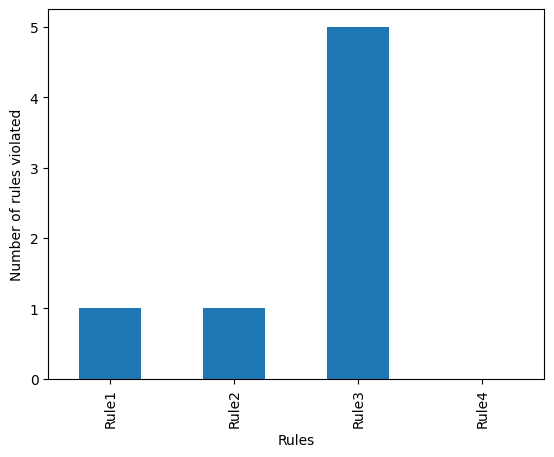

In [8]:
plt.figure()
df_rule_followed.apply(lambda x:len(x) - x.sum()).plot(kind='bar')
plt.xlabel('Rules')
plt.ylabel('Number of rules violated')

### Q2. Perform the following preprocessing tasks on the dirty_iris datasetii.

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df1=pd.read_csv("dirty_iris.csv")
df1

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
0             6.4          3.2           4.5          1.5  versicolor
1             6.3          3.3           6.0          2.5   virginica
2             6.2          NaN           5.4          2.3   virginica
3             5.0          3.4           1.6          0.4      setosa
4             5.7          2.6           3.5          1.0  versicolor
..            ...          ...           ...          ...         ...
145           6.7          3.1           5.6          2.4   virginica
146           5.6          3.0           4.5          1.5  versicolor
147           5.2          3.5           1.5          0.2      setosa
148           6.4          3.1           NaN          1.8   virginica
149           5.8          2.6           4.0          NaN  versicolor

[150 rows x 5 columns]

In [10]:
df1.shape

(150, 5)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  140 non-null    float64
 1   Sepal.Width   133 non-null    float64
 2   Petal.Length  131 non-null    float64
 3   Petal.Width   138 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df1.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
0           6.4          3.2           4.5          1.5  versicolor
1           6.3          3.3           6.0          2.5   virginica
2           6.2          NaN           5.4          2.3   virginica
3           5.0          3.4           1.6          0.4      setosa
4           5.7          2.6           3.5          1.0  versicolor

#### i) Calculate the number and percentage of observations that are complete.

In [13]:
df2 = df1.dropna()
print("No of rows whch are free of null values : ", df2.shape[0])
print("Percentage of rows whch are free of null values : ", (df2.shape[0]/df1.shape[0])*100,"%")

No of rows whch are free of null values :  96
Percentage of rows whch are free of null values :  64.0 %


#### ii) Replace all the special values in data with NA.

In [14]:
df3=df1.replace(to_replace=np.NaN,value="NA")
df3

Sepal.Length Sepal.Width Petal.Length Petal.Width     Species
0            6.4         3.2          4.5         1.5  versicolor
1            6.3         3.3          6.0         2.5   virginica
2            6.2          NA          5.4         2.3   virginica
3            5.0         3.4          1.6         0.4      setosa
4            5.7         2.6          3.5         1.0  versicolor
..           ...         ...          ...         ...         ...
145          6.7         3.1          5.6         2.4   virginica
146          5.6         3.0          4.5         1.5  versicolor
147          5.2         3.5          1.5         0.2      setosa
148          6.4         3.1           NA         1.8   virginica
149          5.8         2.6          4.0          NA  versicolor

[150 rows x 5 columns]

#### iii) Define these rules in a separate text file and read them.
##### (Use editfile function in R (package editrules). Use similar function in Python).
##### Print the resulting constraint object.
##### – Species should be one of the following values: setosa, versicolor or virginica.
##### – All measured numerical properties of an iris should be positive.
##### – The petal length of an iris is at least 2 times its petal width.
##### – The sepal length of an iris cannot exceed 30 cm.
##### – The sepals of an iris are longer than its petals.


In [15]:
Rule1=df1['Species'].apply(lambda x:True if x=='setosa'or x=='versicolor' or x=='virginica'
                          else False)
Rule2=df1.iloc[:,:4].apply(lambda x: True if all (y>0 for y in x) else False, axis=1)
Rule3=df1.apply(lambda x:True if x["Petal.Length"]>=x['Petal.Width']else False, axis=1)
Rule4=df1['Sepal.Length'].apply(lambda x:True if x<=30 else False)
Rule5=df1.apply(lambda x:True if x["Sepal.Length"]>x['Petal.Length']else False, axis=1)

In [16]:
Rule1

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Name: Species, Length: 150, dtype: bool

In [17]:
Rule2

0       True
1       True
2      False
3       True
4       True
       ...  
145     True
146     True
147     True
148    False
149    False
Length: 150, dtype: bool

In [18]:
Rule3

0       True
1       True
2       True
3       True
4       True
       ...  
145     True
146     True
147     True
148    False
149    False
Length: 150, dtype: bool

In [19]:
Rule4

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Name: Sepal.Length, Length: 150, dtype: bool

In [20]:
Rule5

0       True
1       True
2       True
3       True
4       True
       ...  
145     True
146     True
147     True
148    False
149     True
Length: 150, dtype: bool

#### iv)Determine how often each rule is broken (violatedEdits). Also summarize and plot the result.

In [21]:
df_rules=pd.DataFrame({"Rule1":Rule1, "Rule2":Rule2, "Rule3":Rule3, "Rule4":Rule4, "Rule5":Rule5})
df_rules=df_rules.astype(int)
df_rules

Rule1  Rule2  Rule3  Rule4  Rule5
0        1      1      1      1      1
1        1      1      1      1      1
2        1      0      1      1      1
3        1      1      1      1      1
4        1      1      1      1      1
..     ...    ...    ...    ...    ...
145      1      1      1      1      1
146      1      1      1      1      1
147      1      1      1      1      1
148      1      0      0      1      0
149      1      0      0      1      1

[150 rows x 5 columns]

In [22]:
df_rules["Rule1"].value_counts()

Rule1
1    150
Name: count, dtype: int64

In [23]:
df_rules["Rule2"].value_counts()

Rule2
1    93
0    57
Name: count, dtype: int64

In [24]:
df_rules["Rule3"].value_counts()

Rule3
1    116
0     34
Name: count, dtype: int64

In [25]:
df_rules["Rule4"].value_counts()

Rule4
1    138
0     12
Name: count, dtype: int64

In [26]:
df_rules["Rule5"].value_counts()

Rule5
1    120
0     30
Name: count, dtype: int64

Text(0, 0.5, 'Number of records that violates the rule')

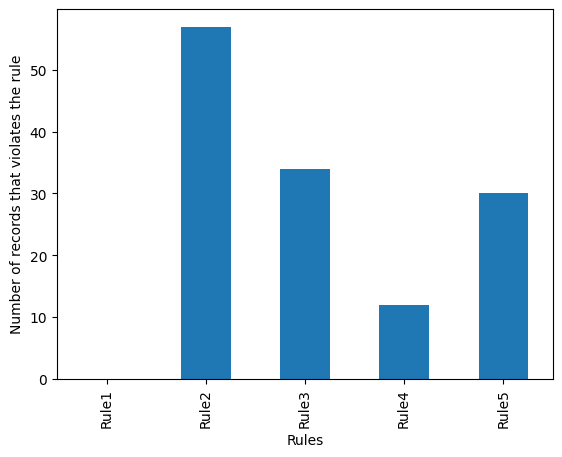

In [27]:
plt.figure()
df_rules.apply(lambda x:len(x) - x.sum()).plot(kind='bar')
plt.xlabel("Rules")
plt.ylabel("Number of records that violates the rule")

#### v) Find outliers in sepal length using boxplot and boxplot.stats

<Axes: >

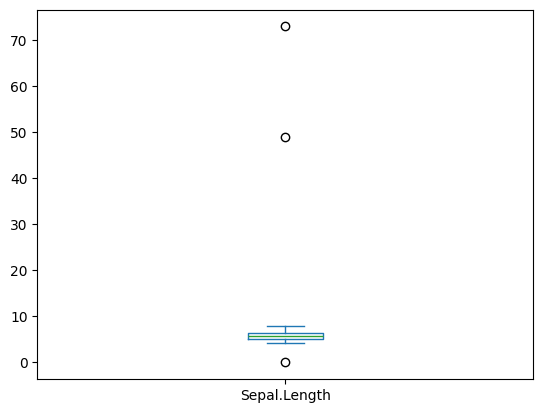

In [28]:
df1["Sepal.Length"].plot(kind="box")

In [29]:
quantile=df1["Sepal.Length"].quantile([0.0,0.25,0.5,0.75,1])
quantile

0.00     0.00
0.25     5.10
0.50     5.75
0.75     6.40
1.00    73.00
Name: Sepal.Length, dtype: float64

### Q3. Load the data from wine dataset. Check whether all attributes are standardized or not (mean is 0 and standard deviation is 1). If not, standardize the attributes. Do the same with Iris dataset.

In [30]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

#### For Iris Datatset

In [31]:
iris=load_iris()
data=pd.DataFrame(iris.data, columns=iris.feature_names)
data["Class"]=iris.target

In [32]:
data

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Class  
0        0  
1        0  
2        0  
3        0  
4        0  
..     ...  
145      2  
146      2  
147      2  
148      2  
149      2  

[150 rows x 5 columns]

In [33]:
X=data.iloc[:,:4]
print("Mean:",  X.mean())
print("Standard Deviation:",  X.std())

Mean: sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
Standard Deviation: sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


##### Standardizing Iris Dataset

In [34]:
scaler=StandardScaler()
Scaled_iris_data=scaler.fit_transform(X)
Scaled_iris_data=pd.DataFrame(Scaled_iris_data,columns=X.columns)
Scaled_iris_data

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.900681          1.019004          -1.340227         -1.315444
1            -1.143017         -0.131979          -1.340227         -1.315444
2            -1.385353          0.328414          -1.397064         -1.315444
3            -1.506521          0.098217          -1.283389         -1.315444
4            -1.021849          1.249201          -1.340227         -1.315444
..                 ...               ...                ...               ...
145           1.038005         -0.131979           0.819596          1.448832
146           0.553333         -1.282963           0.705921          0.922303
147           0.795669         -0.131979           0.819596          1.053935
148           0.432165          0.788808           0.933271          1.448832
149           0.068662         -0.131979           0.762758          0.790671

[150 rows x 4 columns]

In [35]:
print("Mean:",  Scaled_iris_data.mean())
print("Standard Deviation:",  Scaled_iris_data.std())

Mean: sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
Standard Deviation: sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
dtype: float64


#### For Wine Dataset

In [36]:
wine=load_wine()
dt=pd.DataFrame(wine.data, columns=wine.feature_names)
dt["Class"]=wine.target
dt

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  Class  
0                            3.92   1065.0      0  
1                            3.40   1050.0      0  
2                            3.17   1185.0      0  
3                            3.45   1480.0      0  
4                            2.93    735.0      0  
..                            ...      ...    ...  
173                          1.74    740.0      2  
174                          1.56    750.0      2  
175                          1.56    835.0      2  
176                          1.62    840.0      2  
177                          1.60    560.0      2  

[178 rows x 14 columns]

In [37]:
X1=dt.iloc[:,:13]
print("Mean:",  X1.mean())
print("Standard Deviation:",  X1.std())

Mean: alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64
Standard Deviation: alcohol                           0.811827
malic_acid                        1.117146
ash                               0.274344
alcalinity_of_ash                 3.339564
magnesium                        14.282484
total_phenols                     0.625851
flavanoids                        0.998859
nonflavanoid_phenols              0.124453
proanthocyanins                   0.572359
color_intensi

##### Standardizing Wine Dataset

In [38]:
scaler=StandardScaler()
Scaled_wine_data=scaler.fit_transform(X1)
Scaled_wine_data=pd.DataFrame(Scaled_wine_data,columns=X1.columns)
Scaled_wine_data

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0    1.518613   -0.562250  0.232053          -1.169593   1.913905   
1    0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2    0.196879    0.021231  1.109334          -0.268738   0.088358   
3    1.691550   -0.346811  0.487926          -0.809251   0.930918   
4    0.295700    0.227694  1.840403           0.451946   1.281985   
..        ...         ...       ...                ...        ...   
173  0.876275    2.974543  0.305159           0.301803  -0.332922   
174  0.493343    1.412609  0.414820           1.052516   0.158572   
175  0.332758    1.744744 -0.389355           0.151661   1.422412   
176  0.209232    0.227694  0.012732           0.151661   1.422412   
177  1.395086    1.583165  1.365208           1.502943  -0.262708   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0         0.808997    1.034819             -0.659563         1.224884   
1         0.568648    0.733629             -0.820719        -0.544721   
2         0.808997    1.215533             -0.498407         2.135968   
3         2.491446    1.466525             -0.981875         1.032155   
4         0.808997    0.663351              0.226796         0.401404   
..             ...         ...                   ...              ...   
173      -0.985614   -1.424900              1.274310        -0.930179   
174      -0.793334   -1.284344              0.549108        -0.316950   
175      -1.129824   -1.344582              0.549108        -0.422075   
176      -1.033684   -1.354622              1.354888        -0.229346   
177      -0.392751   -1.274305              1.596623        -0.422075   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  
0           0.251717  0.362177                      1.847920  1.013009  
1          -0.293321  0.406051                      1.113449  0.965242  
2           0.269020  0.318304                      0.788587  1.395148  
3           1.186068 -0.427544                      1.184071  2.334574  
4          -0.319276  0.362177                      0.449601 -0.037874  
..               ...       ...                           ...       ...  
173         1.142811 -1.392758                     -1.231206 -0.021952  
174         0.969783 -1.129518                     -1.485445  0.009893  
175         2.224236 -1.612125                     -1.485445  0.280575  
176         1.834923 -1.568252                     -1.400699  0.296498  
177         1.791666 -1.524378                     -1.428948 -0.595160  

[178 rows x 13 columns]

In [39]:
print("Mean:",  Scaled_wine_data.mean())
print("Standard Deviation:",  Scaled_wine_data.std())

Mean: alcohol                         7.841418e-15
malic_acid                      2.444986e-16
ash                            -4.059175e-15
alcalinity_of_ash              -7.110417e-17
magnesium                      -2.494883e-17
total_phenols                  -1.955365e-16
flavanoids                      9.443133e-16
nonflavanoid_phenols           -4.178929e-16
proanthocyanins                -1.540590e-15
color_intensity                -4.129032e-16
hue                             1.398382e-15
od280/od315_of_diluted_wines    2.126888e-15
proline                        -6.985673e-17
dtype: float64
Standard Deviation: alcohol                         1.002821
malic_acid                      1.002821
ash                             1.002821
alcalinity_of_ash               1.002821
magnesium                       1.002821
total_phenols                   1.002821
flavanoids                      1.002821
nonflavanoid_phenols            1.002821
proanthocyanins                 1.002821
color

### Q4. Run Apriori algorithm to find frequent itemsets and association rules

In [40]:
import pandas as pd
from sklearn.datasets import load_iris
from mlxtend.frequent_patterns import apriori, association_rules

In [41]:
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Encode features as binary (1 if present, 0 if absent)
encoded_iris_data = iris_data.applymap(lambda x: 1 if x > 0 else 0)

C:\Users\Skand Singh\AppData\Local\Temp\ipykernel_10820\2105926623.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_iris_data = iris_data.applymap(lambda x: 1 if x > 0 else 0)


In [42]:
# Minimum support = 50%, Minimum confidence = 75%
frequent_itemsets_1 = apriori(encoded_iris_data, min_support=0.5, use_colnames=True)
association_rules_1 = association_rules(frequent_itemsets_1, metric='confidence', min_threshold=0.75)

print("Association Rules (Min Support = 50%, Min Confidence = 75%):")
print(association_rules_1)

Association Rules (Min Support = 50%, Min Confidence = 75%):
                                          antecedents  \
0                                  (sepal width (cm))   
1                                 (sepal length (cm))   
2                                 (petal length (cm))   
3                                 (sepal length (cm))   
4                                  (petal width (cm))   
5                                 (sepal length (cm))   
6                                  (sepal width (cm))   
7                                 (petal length (cm))   
8                                  (sepal width (cm))   
9                                  (petal width (cm))   
10                                (petal length (cm))   
11                                 (petal width (cm))   
12              (sepal width (cm), petal length (cm))   
13              (sepal width (cm), sepal length (cm))   
14             (petal length (cm), sepal length (cm))   
15                         

C:\Users\Skand Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [43]:
# Minimum support = 60%, Minimum confidence = 60%
frequent_itemsets_2 = apriori(encoded_iris_data, min_support=0.6, use_colnames=True)
association_rules_2 = association_rules(frequent_itemsets_2, metric='confidence', min_threshold=0.6)

print("\nAssociation Rules (Min Support = 60%, Min Confidence = 60%):")
print(association_rules_2)


Association Rules (Min Support = 60%, Min Confidence = 60%):
                                          antecedents  \
0                                  (sepal width (cm))   
1                                 (sepal length (cm))   
2                                 (petal length (cm))   
3                                 (sepal length (cm))   
4                                  (petal width (cm))   
5                                 (sepal length (cm))   
6                                  (sepal width (cm))   
7                                 (petal length (cm))   
8                                  (sepal width (cm))   
9                                  (petal width (cm))   
10                                (petal length (cm))   
11                                 (petal width (cm))   
12              (sepal width (cm), petal length (cm))   
13              (sepal width (cm), sepal length (cm))   
14             (petal length (cm), sepal length (cm))   
15                        

C:\Users\Skand Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


### Q5. Use Naive bayes, K-nearest, and Decision tree classification algorithms and build classifiers. Divide the data set into training and test set. Compare the accuracy of the different classifiers under the following situations:

In [44]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#### 5.1 a) Training set = 75% Test set = 25% b) Training set = 66.6% (2/3rd of total), Test set = 33.3%

#### Iris Dataset

In [45]:
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training (75%) and test (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize classifiers
nb_classifier = GaussianNB()
knn_classifier = KNeighborsClassifier(n_neighbors=3)
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit classifiers to training data
nb_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)

# Make predictions on test data
nb_predictions = nb_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)
dt_predictions = dt_classifier.predict(X_test)

# Calculate accuracy for each classifier
nb_accuracy = accuracy_score(y_test, nb_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

Naive Bayes Accuracy: 1.0000
K-Nearest Neighbors Accuracy: 1.0000
Decision Tree Accuracy: 1.0000


In [46]:
#Split the dataset into training (66.6%) and test (33.3%) sets
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.333, random_state=42)

nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)

nb.fit(X_train_, y_train_)
knn.fit(X_train_, y_train_)
decision_tree.fit(X_train_, y_train_)

nb_pred = nb.predict(X_test_)
knn_pred = knn.predict(X_test_)
tree_pred = decision_tree.predict(X_test_)

nb_acc = accuracy_score(y_test_, nb_pred)
knn_acc = accuracy_score(y_test_, knn_pred)
tree_acc = accuracy_score(y_test_, tree_pred)

print(f"Naive Bayes Accuracy: {nb_acc:.4f}")
print(f"K-Nearest Neighbors Accuracy: {knn_acc:.4f}")
print(f"Decision Tree Accuracy: {tree_acc:.4f}")

Naive Bayes Accuracy: 0.9600
K-Nearest Neighbors Accuracy: 0.9800
Decision Tree Accuracy: 0.9800


#### Wine Dataset

In [47]:
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

In [48]:
#Split the dataset into training (75%) and test (25%) sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25, random_state=42)

nb1 = GaussianNB()
knn1 = KNeighborsClassifier(n_neighbors=3)
decision_tree1 = DecisionTreeClassifier(criterion='entropy', random_state=42)

nb1.fit(X_train1, y_train1)
knn1.fit(X_train1, y_train1)
decision_tree1.fit(X_train1, y_train1)

nb_pred1 = nb.predict(X_test1)
knn_pred1 = knn.predict(X_test1)
tree_pred1 = decision_tree.predict(X_test1)

nb_acc1 = accuracy_score(y_test1, nb_pred1)
knn_acc1 = accuracy_score(y_test1, knn_pred1)
tree_acc1 = accuracy_score(y_test1, tree_pred1)

print(f"Naive Bayes Accuracy: {nb_acc1:.4f}")
print(f"K-Nearest Neighbors Accuracy: {knn_acc1:.4f}")
print(f"Decision Tree Accuracy: {tree_acc1:.4f}")

Naive Bayes Accuracy: 0.9737
K-Nearest Neighbors Accuracy: 1.0000
Decision Tree Accuracy: 1.0000


In [49]:
#Split the dataset into training (66.6%) and test (33.3%) sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.333, random_state=42)

nb2 = GaussianNB()
knn2 = KNeighborsClassifier(n_neighbors=3)
decision_tree2 = DecisionTreeClassifier(criterion='entropy', random_state=42)

nb2.fit(X_train2, y_train2)
knn2.fit(X_train2, y_train2)
decision_tree2.fit(X_train2, y_train2)

nb_pred2 = nb.predict(X_test2)
knn_pred2 = knn.predict(X_test2)
tree_pred2 = decision_tree.predict(X_test2)

nb_acc2 = accuracy_score(y_test2, nb_pred2)
knn_acc2 = accuracy_score(y_test2, knn_pred2)
tree_acc2 = accuracy_score(y_test2, tree_pred2)

print(f"Naive Bayes Accuracy: {nb_acc2:.4f}")
print(f"K-Nearest Neighbors Accuracy: {knn_acc2:.4f}")
print(f"Decision Tree Accuracy: {tree_acc2:.4f}")

Naive Bayes Accuracy: 0.9600
K-Nearest Neighbors Accuracy: 0.9800
Decision Tree Accuracy: 0.9800


#### 5.2 Training set is chosen by i) hold out method ii) Random subsampling iii) Cross-Validation. Compare the accuracy of the classifiers obtained.

#### Iris Dataset

##### Hold-Out Method

In [50]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and test sets using hold-out method (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize classifiers
nb_classifier = GaussianNB()
knn_classifier = KNeighborsClassifier(n_neighbors=3)
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit classifiers to training data
nb_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)

# Make predictions on test data
nb_predictions = nb_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)
dt_predictions = dt_classifier.predict(X_test)

# Calculate accuracy for each classifier
nb_accuracy = accuracy_score(y_test, nb_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("Accuracy using hold-out method:")
print(f"Naive Bayes: {nb_accuracy:.4f}")
print(f"K-Nearest Neighbors: {knn_accuracy:.4f}")
print(f"Decision Tree: {dt_accuracy:.4f}")
print()

Accuracy using hold-out method:
Naive Bayes: 1.0000
K-Nearest Neighbors: 1.0000
Decision Tree: 1.0000



##### Random Subsampling Method

In [51]:
# Now let's use random subsampling (66.6% train, 33.3% test)
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.333, random_state=42)

# Fit classifiers to subsampled training data
nb_classifier.fit(X_train_sub, y_train_sub)
knn_classifier.fit(X_train_sub, y_train_sub)
dt_classifier.fit(X_train_sub, y_train_sub)

# Make predictions on subsampled test data
nb_predictions_sub = nb_classifier.predict(X_test_sub)
knn_predictions_sub = knn_classifier.predict(X_test_sub)
dt_predictions_sub = dt_classifier.predict(X_test_sub)

# Calculate accuracy for each classifier with random subsampling
nb_accuracy_sub = accuracy_score(y_test_sub, nb_predictions_sub)
knn_accuracy_sub = accuracy_score(y_test_sub, knn_predictions_sub)
dt_accuracy_sub = accuracy_score(y_test_sub, dt_predictions_sub)

print("Accuracy using random subsampling:")
print(f"Naive Bayes: {nb_accuracy_sub:.4f}")
print(f"K-Nearest Neighbors: {knn_accuracy_sub:.4f}")
print(f"Decision Tree: {dt_accuracy_sub:.4f}")
print()

Accuracy using random subsampling:
Naive Bayes: 0.9600
K-Nearest Neighbors: 0.9800
Decision Tree: 0.9800



##### Cross-Validation Method

In [52]:
from sklearn.model_selection import cross_val_score

# Initialize classifiers
nb_classifier_cv = GaussianNB()
knn_classifier_cv = KNeighborsClassifier(n_neighbors=3)
dt_classifier_cv = DecisionTreeClassifier(random_state=42)

# Calculate cross-validated accuracy for each classifier
nb_cv_scores = cross_val_score(nb_classifier_cv, X, y, cv=5)
knn_cv_scores = cross_val_score(knn_classifier_cv, X, y, cv=5)
dt_cv_scores = cross_val_score(dt_classifier_cv, X, y, cv=5)

print("Accuracy using 5-fold cross-validation:")
print(f"Naive Bayes: {np.mean(nb_cv_scores):.4f}")
print(f"K-Nearest Neighbors: {np.mean(knn_cv_scores):.4f}")
print(f"Decision Tree: {np.mean(dt_cv_scores):.4f}")

Accuracy using 5-fold cross-validation:
Naive Bayes: 0.9533
K-Nearest Neighbors: 0.9667
Decision Tree: 0.9533


#### Wine Dataset

##### Hold-Out Method

In [53]:
# Load the Wine dataset
wine = load_wine()
X_wine, y_wine = wine.data, wine.target

# Split the dataset into training and test sets using hold-out method (75% train, 25% test)
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize classifiers
nb_classifier_ = GaussianNB()
knn_classifier_ = KNeighborsClassifier(n_neighbors=3)
dt_classifier_ = DecisionTreeClassifier(random_state=42)

# Fit classifiers to training data
nb_classifier_.fit(X_train_, y_train_)
knn_classifier_.fit(X_train_, y_train_)
dt_classifier_.fit(X_train_, y_train_)

# Make predictions on test data
nb_predictions_ = nb_classifier_.predict(X_test_)
knn_predictions_ = knn_classifier_.predict(X_test_)
dt_predictions_ = dt_classifier_.predict(X_test_)

# Calculate accuracy for each classifier
nb_accuracy_ = accuracy_score(y_test_, nb_predictions_)
knn_accuracy_ = accuracy_score(y_test_, knn_predictions_)
dt_accuracy_ = accuracy_score(y_test_, dt_predictions_)

print("Accuracy using hold-out method:")
print(f"Naive Bayes: {nb_accuracy_:.4f}")
print(f"K-Nearest Neighbors: {knn_accuracy_:.4f}")
print(f"Decision Tree: {dt_accuracy_:.4f}")
print()

Accuracy using hold-out method:
Naive Bayes: 1.0000
K-Nearest Neighbors: 1.0000
Decision Tree: 1.0000



##### Random Subsampling Method

In [54]:
# Now let's use random subsampling (66.6% train, 33.3% test)
X_train_sub_, X_test_sub_, y_train_sub_, y_test_sub_ = train_test_split(X, y, test_size=0.333, random_state=42)

# Fit classifiers to subsampled training data
nb_classifier.fit(X_train_sub_, y_train_sub_)
knn_classifier.fit(X_train_sub_, y_train_sub_)
dt_classifier.fit(X_train_sub_, y_train_sub_)

# Make predictions on subsampled test data
nb_predictions_sub_ = nb_classifier.predict(X_test_sub_)
knn_predictions_sub_ = knn_classifier.predict(X_test_sub_)
dt_predictions_sub_ = dt_classifier.predict(X_test_sub_)

# Calculate accuracy for each classifier with random subsampling
nb_accuracy_sub_ = accuracy_score(y_test_sub_, nb_predictions_sub_)
knn_accuracy_sub_ = accuracy_score(y_test_sub_, knn_predictions_sub_)
dt_accuracy_sub_ = accuracy_score(y_test_sub_, dt_predictions_sub_)

print("Accuracy using random subsampling:")
print(f"Naive Bayes: {nb_accuracy_sub_:.4f}")
print(f"K-Nearest Neighbors: {knn_accuracy_sub_:.4f}")
print(f"Decision Tree: {dt_accuracy_sub_:.4f}")
print()

Accuracy using random subsampling:
Naive Bayes: 0.9600
K-Nearest Neighbors: 0.9800
Decision Tree: 0.9800



##### Cross-Validation Method

In [55]:
# Initialize classifiers
nb_classifier_cv_ = GaussianNB()
knn_classifier_cv_ = KNeighborsClassifier(n_neighbors=3)
dt_classifier_cv_ = DecisionTreeClassifier(random_state=42)

# Calculate cross-validated accuracy for each classifier
nb_cv_scores_ = cross_val_score(nb_classifier_cv_, X, y, cv=5)
knn_cv_scores_ = cross_val_score(knn_classifier_cv_, X, y, cv=5)
dt_cv_scores_ = cross_val_score(dt_classifier_cv_, X, y, cv=5)

print("Accuracy using 5-fold cross-validation:")
print(f"Naive Bayes: {np.mean(nb_cv_scores_):.4f}")
print(f"K-Nearest Neighbors: {np.mean(knn_cv_scores_):.4f}")
print(f"Decision Tree: {np.mean(dt_cv_scores_):.4f}")

Accuracy using 5-fold cross-validation:
Naive Bayes: 0.9533
K-Nearest Neighbors: 0.9667
Decision Tree: 0.9533


#### 5.3 Data is scaled to standard format.

#### Iris Dataset

In [56]:
from sklearn.preprocessing import StandardScaler
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and test sets using hold-out method (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the data
iscaler = StandardScaler()
X_train_scaled = iscaler.fit_transform(X_train)
X_test_scaled = iscaler.transform(X_test)

# Initialize classifiers
nb_classifier = GaussianNB()
knn_classifier = KNeighborsClassifier(n_neighbors=3)
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit classifiers to training data
nb_classifier.fit(X_train_scaled, y_train)
knn_classifier.fit(X_train_scaled, y_train)
dt_classifier.fit(X_train_scaled, y_train)

# Make predictions on test data
nb_predictions = nb_classifier.predict(X_test_scaled)
knn_predictions = knn_classifier.predict(X_test_scaled)
dt_predictions = dt_classifier.predict(X_test_scaled)

# Calculate accuracy for each classifier
nb_accuracy = accuracy_score(y_test, nb_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("Accuracy using hold-out method:")
print(f"Naive Bayes: {nb_accuracy:.4f}")
print(f"K-Nearest Neighbors: {knn_accuracy:.4f}")
print(f"Decision Tree: {dt_accuracy:.4f}")
print()

Accuracy using hold-out method:
Naive Bayes: 1.0000
K-Nearest Neighbors: 1.0000
Decision Tree: 1.0000



#### Wine Dataset

In [57]:
# Load the Iris dataset
wine = load_wine()
X_wine, y_wine = wine.data, wine.target

# Split the dataset into training and test sets using hold-out method (75% train, 25% test)
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the data
wscaler = StandardScaler()
X_train_scaled_ = wscaler.fit_transform(X_train_)
X_test_scaled_ = wscaler.transform(X_test_)

# Initialize classifiers
nb_classifier_ = GaussianNB()
knn_classifier_ = KNeighborsClassifier(n_neighbors=3)
dt_classifier_ = DecisionTreeClassifier(random_state=42)

# Fit classifiers to training data
nb_classifier_.fit(X_train_scaled_, y_train)
knn_classifier_.fit(X_train_scaled_, y_train)
dt_classifier_.fit(X_train_scaled_, y_train)

# Make predictions on test data
nb_predictions_ = nb_classifier_.predict(X_test_scaled_)
knn_predictions_ = knn_classifier_.predict(X_test_scaled_)
dt_predictions_ = dt_classifier_.predict(X_test_scaled_)

# Calculate accuracy for each classifier
nb_accuracy_ = accuracy_score(y_test, nb_predictions_)
knn_accuracy_ = accuracy_score(y_test, knn_predictions_)
dt_accuracy_ = accuracy_score(y_test, dt_predictions_)

print("Accuracy using hold-out method:")
print(f"Naive Bayes: {nb_accuracy_:.4f}")
print(f"K-Nearest Neighbors: {knn_accuracy_:.4f}")
print(f"Decision Tree: {dt_accuracy_:.4f}")
print()

Accuracy using hold-out method:
Naive Bayes: 1.0000
K-Nearest Neighbors: 1.0000
Decision Tree: 1.0000



### Q6. Use Simple Kmeans, DBScan, Hierachical clustering algorithms for clustering. Compare the performance of clusters by changing the parameters involved in the algorithms.

#### For Wine Dataset

In [58]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Load the Wine dataset
wine = load_wine()
X_wine = wine.data

# Standardize the features
wscaler = StandardScaler()
X_scaled_ = wscaler.fit_transform(X_wine)

# Initialize clustering algorithms
kmeans_ = KMeans(n_clusters=3, random_state=42, n_init=10)
dbscan_ = DBSCAN(eps=0.5, min_samples=5)
hierarchical_ = AgglomerativeClustering(n_clusters=3)

# Fit the models
kmeans_.fit(X_scaled_)
dbscan_.fit(X_scaled_)
hierarchical_.fit(X_scaled_)

# Evaluate the performance
kmeans_silhouette_ = silhouette_score(X_scaled_, kmeans_.labels_)
#dbscan_silhouette_ = silhouette_score(X_scaled_, dbscan_.labels_)
hierarchical_silhouette_ = silhouette_score(X_scaled_, hierarchical_.labels_)

print(f"K-Means Silhouette Score: {kmeans_silhouette_:.2f}")
#print(f"DBScan Silhouette Score: {dbscan_silhouette_:.2f}")
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette_:.2f}")


K-Means Silhouette Score: 0.28
Hierarchical Silhouette Score: 0.28


#### For Iris Dataset

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize clustering algorithms
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
dbscan = DBSCAN(eps=0.5, min_samples=5)
hierarchical = AgglomerativeClustering(n_clusters=3)

# Fit the models
kmeans.fit(X_scaled)
dbscan.fit(X_scaled)
hierarchical.fit(X_scaled)

# Evaluate the performance
kmeans_silhouette = silhouette_score(X_scaled, kmeans.labels_)
dbscan_silhouette = silhouette_score(X_scaled, dbscan.labels_)
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical.labels_)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")
print(f"DBScan Silhouette Score: {dbscan_silhouette:.2f}")
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette:.2f}")

K-Means Silhouette Score: 0.46
DBScan Silhouette Score: 0.36
Hierarchical Silhouette Score: 0.45
